In [ ]:
import math

def poss_adjuster(data, possession):
     print((data*2)/(1+ math.exp((-0.1*possession)+5)))

In [ ]:
to do: pizza: change data label styles, set up equivalent for attacking midfielders, wingers, midfielders, defensive midfielder, fullback, goalkeeper, central defender


In [2]:
from mplsoccer import Radar, FontManager,PyPizza, add_image
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlopen
from PIL import Image


plt.rcParams["font.family"] = "Roboto"

font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)


URL = "https://github.com/JamesCS1999/Football/blob/main/TGMetrics%20logo.png?raw=true"
logo = Image.open(urlopen(URL))

#  Single player (percentiles as size, per 90 stats as labels)

In [19]:
params = ["Non-penalty\nGoals","NpG -NpXg","xA","Shot Creating\nActions","Dispossessed",
          "Pass completion\n%","Progressive\nPasses", "Progressive\nCarries","Carries into\npenalty area", 
          "Successful\ntake-ons", "Tackles in final\n3rd","Passes blocked"
]

# "Ball\nretention" | "Defending\nquality", "Defending\nquantity"

values = [94, 97, 73, 66, 12, 81,73, 90,23, 81, 16, 33]

data_labels = [0.68,0.23,0.11,2.65,'86*',75.7,2.25,2.76,29.51,1.30,'16*','33*']

# Add anything to this list where having a lower number is better - this flips the statistic
lower_is_better = ['Dispossessed']

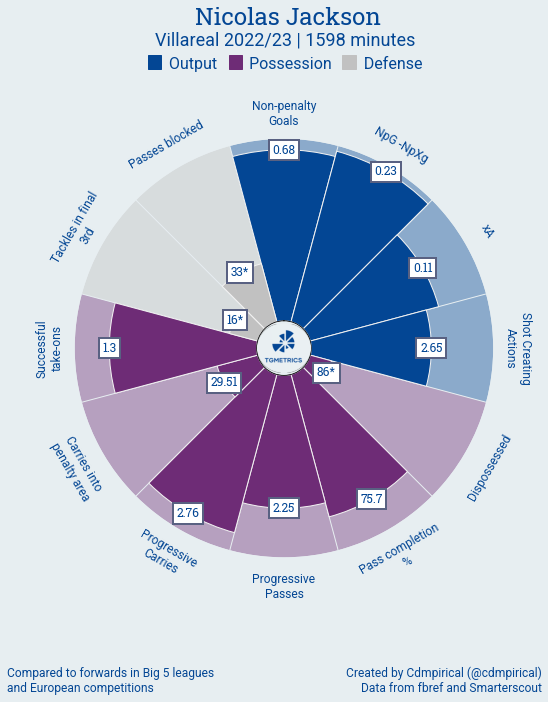

In [20]:
# color for the slices and text
slice_colors = ["#034694"] * 4 + ["#6E2C76"] * 6 + ["#C1C1C1"] * 2 
text_colors = ["#F2F2F2"] * 6 + ["#034694"] * 6

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#E7EEF1",     # background color
    straight_line_color="#E7EEF1",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=15            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(7.5, 9.5),              # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    param_location = (115),
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#034694", fontsize=12,fontproperties = font_normal.prop,
        va= 'center_baseline'
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=0,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# change data labels 

initial_angle = 0.0
angle = 2 * np.pi / 12
angles = np.linspace(start=initial_angle, stop=initial_angle + 2 * np.pi, num=12, endpoint=False)


for label, angle, value, position in zip(params, angles, data_labels,values):
    text = ax.text(angle,position,str(value), ha='center', va='center',
                   fontsize=12,fontproperties = font_bold.prop, color='#034694', bbox=dict(boxstyle="square", pad=0.3,
                                                             fc="#FFFFFF", ec="#596182", lw=2))
# title 

fig.text(
        0.52, 0.975,"Nicolas Jackson",
    size=24,fontproperties = font_bold.prop,
    ha="center",color="#034694"
)

fig.text(
    0.515, 0.945,
    "Villareal 2022/23 | 1598 minutes",
    size=18,fontproperties=font_normal.prop,
    ha="center",color="#034694"
)

# add credits
CREDIT_1 = "Created by Cdmpirical (@cdmpirical)\nData from fbref and Smarterscout"
CREDIT_2 = "Data from Fbref"
CREDIT_3 = "Compared to forwards in Big 5 leagues"
CREDIT_4 = "and European competitions"

fig.text(
    0.99, 0.0, f"{CREDIT_1}", size=12,color="#034694",fontproperties = font_normal.prop,
    ha="right"
),

fig.text(
    0.00, 0.0, f"{CREDIT_3}\n{CREDIT_4}", size=12,color="#034694",fontproperties = font_normal.prop,
    ha="left"
)

# add text

fig.text(
    0.3, 0.9105,"Output        Possession        Defense", size=16,fontproperties=font_normal.prop,color="#034694")
  
# add rectangles

fig.patches.extend([
    plt.Rectangle(
        (0.26, 0.91), 0.025, 0.021, fill=True, color= '#034694', #"#1a78cf"
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.41, 0.91), 0.025, 0.021, fill=True, color="#6E2C76",
        transform=fig.transFigure, figure=fig
        ),
    plt.Rectangle(
        (0.62, 0.91), 0.025, 0.021, fill=True, color="#C1C1C1",
        transform=fig.transFigure, figure=fig),
        ])

ax_image = add_image(
    logo, fig, left=0.463, bottom=0.392, width=0.099, height=0.22)   

# Single - top and worst performing metrics

In [ ]:
params = ["Shots on\ntarget %","Goal Creating\nActions (take-ons)","Pass completion %\n(Long)","Goals/Shot",
          "Ball\nretention","Pass completion\n%","% Ariel duels\nwon","Progressive\nPasses", "Progressive\nCarries", 
          "Touches","Defending\nquality", "Defending\nquantity"
]

values = [99, 99, 98, 98, 86, 81, 11, 73, 90,23, 16, 33]

data_labels = [56.1,0.39,86.7,0.29,'86*',75.7,30.2,2.25,2.76,29.51,'16.0*','33.0*']

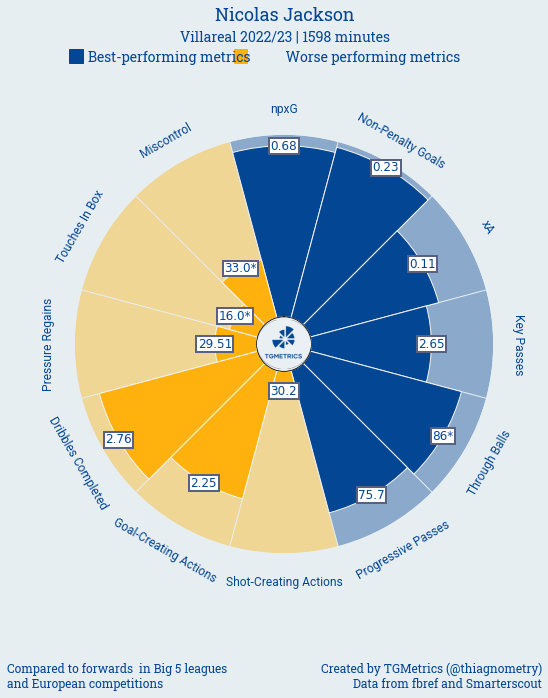

In [1059]:
# color for the slices and text
slice_colors = ["#034694"] * 6 + ["#FFB20D"] * 6 
text_colors = ["#F2F2F2"] * 6 + ["#034694"] * 6

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#E7EEF1",     # background color
    straight_line_color="#E7EEF1",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=15            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(7.5, 9.5),              # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    param_location = (115),
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#034694", fontsize=12,
        fontproperties=font_normal.prop, va= 'center_baseline'
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=0,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# change data labels 

initial_angle = 0.0
angle = 2 * np.pi / 12
angles = np.linspace(start=initial_angle, stop=initial_angle + 2 * np.pi, num=12, endpoint=False)


for label, angle, value, position in zip(params, angles, data_labels,values):
    text = ax.text(angle,position,str(value), ha='center', va='center',
                   fontsize=12, color='#034694', bbox=dict(boxstyle="square", pad=0.12,
                                                             fc="#FFFFFF", ec="#596182", lw=2))
# title 

fig.text(
        0.515, 0.975,"Nicolas Jackson",
    size=18,
    ha="center", fontproperties=font_bold.prop, color="#034694"
)

fig.text(
    0.515, 0.945,
    "Villareal 2022/23 | 1598 minutes",
    size=14,
    ha="center", fontproperties=font_bold.prop, color="#034694"
)

# add credits
CREDIT_1 = "Created by TGMetrics (@thiagnometry)\nData from fbref and Smarterscout"
CREDIT_2 = "Data from Fbref"
CREDIT_3 = "Compared to forwards  in Big 5 leagues"
CREDIT_4 = "and European competitions"

fig.text(
    0.99, 0.0, f"{CREDIT_1}", size=12,
    fontproperties=font_bold.prop,color="#034694",
    ha="right"
),

fig.text(
    0.00, 0.0, f"{CREDIT_3}\n{CREDIT_4}", size=12,
    fontproperties=font_bold.prop,color="#034694",
    ha="left"
)

# add text

fig.text(
    0.15, 0.915, "Best-performing metrics          Worse performing metrics", size=14,
    fontproperties=font_bold.prop,color="#034694")

# add rectangles

fig.patches.extend([
    plt.Rectangle(
        (0.115, 0.913), 0.025, 0.021, fill=True, color= '#034694', #"#1a78cf"
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.42, 0.913), 0.025, 0.021, fill=True, color="#FFB20D",
        transform=fig.transFigure, figure=fig),
        ])

ax_image = add_image(
    logo, fig, left=0.463, bottom=0.392, width=0.099, height=0.22)   

## Comparison - radar (percentile as size, labels as per 90 stats)

In [25]:
# parameter names of the statistics we want to show
params = ["Non-penalty\nGoals","NpG-NpXg","xA","Shot Creating\nActions","Dispossessed",
          "Pass completion\n%","Progressive\nPasses", "Progressive\nCarries","Carries into penalty area", 
          "Successful take-ons", "Tackles in final\n3rd","Passes blocked"
]

# Add anything to this list where having a lower number is better this flips the statistic
lower_is_better = ["Dispossessed"]

# The lower and upper boundaries for the statistics

low = [0,0,0,0,0,0,0,0,0,0,0,0]
high = [100,100,100,100,100,100,100,100,100,100,100,100]

values_player1 = [94, 97, 73, 66, 12, 81,73, 90,23, 11, 16, 33]
values_player2 = [48,73,6,11,11,9,20,71,24,45,52,93]

data_labels_player1 = [0.68,0.23,0.11,2.65,'86*',75.7,2.25,2.76,29.51,30.2,'16*','33*']
data_labels_player2 = [0.27,0.0,0.05,1.73,'11*',60.1,1.32,2.55,30.67,34.6,'52*','93*']

radar = Radar(params, low, high, lower_is_better = lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=3,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=4, center_circle_radius=2.3)

fig, ax = radar.setup_axis(facecolor = '#E7EEF1')  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#E7EEF1', edgecolor='#034964')  # draw circles
radar_output = radar.draw_radar_compare(values_player1, values_player2, ax=ax,
                                kwargs_radar={'facecolor': '#034694', 'alpha': 0.3},
                                kwargs_compare={'facecolor': '#6E2C76', 'alpha': 0.3})
                               # kwargs_rings={'facecolor': '#aa65b2','alpha': 0.01})  # draw the radar
radar_poly,  radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=0,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=12,color = '#034694',
                                      fontproperties = font_bold.prop) # draw the param labels

# add data labels

for (i,value),angle,label in zip(enumerate(values_player1),angles, data_labels_player1):
    x = (12 * np.sin(angle)/100 * value) + (2.3 * np.sin(angle))
    y = (12 * np.cos(angle)/100 * value) + (2.3 * np.cos(angle))
    text = ax.text(x, y, str(label), ha='center', va='center', fontproperties = font_bold.prop,
                   fontsize=12, color='#034694', bbox=dict(boxstyle="square", pad=0.2,
                                                             fc="#FFFFFF", ec="#034694", lw=2))

    
for (i,value),angle,label in zip(enumerate(values_player2),angles, data_labels_player2):
    x = (12 * np.sin(angle)/100 * value) + (2.3 * np.sin(angle))
    y = (12 * np.cos(angle)/100 * value)+ (2.3 * np.cos(angle))
    text = ax.text(x, y, str(label), ha='center', va='center', fontproperties = font_bold.prop,
                   fontsize=12, color='#6E2C76', bbox=dict(boxstyle="square", pad=0.2,
                                                             fc="#FFFFFF", ec="#6E2C76", lw=2))
    
    
#  title 

fig.text(
        0.295, 0.85,"Nicolas Jackson",
    size=22,fontproperties = font_bold.prop,
    ha="center",color="#034694"
)

fig.text(
    0.29, 0.825,
    "Villareal 2022/23 | 1598 minutes",
    size=16,fontproperties=font_normal.prop,
    ha="center",color="#034694"
)

fig.text(
            0.705, 0.85,"Armando Broja",
    size=22,fontproperties = font_bold.prop,
    ha="center",color="#6E2C76"
)

fig.text(
    0.71, 0.825,
    "Southampton 2021/22 | 2488 minutes",
    size=16,fontproperties=font_normal.prop,
    ha="center",color="#6E2C76")

fig.text(
            0.5, 0.8375,"Vs",
    size=20,fontproperties = font_bold.prop,
    ha="center",color="#000000"
)


# add credits
CREDIT_1 = "Created by Cdmpirical (@cdmpirical)\nData from fbref and Smarterscout"
CREDIT_2 = "Data from Fbref"
CREDIT_3 = "Compared to forwards in Big 5 leagues"
CREDIT_4 = "and European competitions"

fig.text(
    0.885, 0.13, f"{CREDIT_1}", size=12,color="#034694",fontproperties = font_normal.prop,
    ha="right"
),

fig.text(
    0.1375, 0.13, f"{CREDIT_3}\n{CREDIT_4}", size=12,color="#034694",fontproperties = font_normal.prop,
    ha="left"
)


ax_image = add_image(
    logo, fig, left=0.47, bottom=0.3915, width=0.08, height=0.221)   

TypeError: __init__() got an unexpected keyword argument 'lower_is_better'

# Comparison - radar (percentile as size, percentile as labels)

In [ ]:
params = ["Non-penalty\nGoals","Np goals -\nNp Xg","xA","Shot Creating Actions",
          "Ball retention","Pass completion\n%","% Ariel duels\nwon", "Progressive\nPasses", "Progressive\nCarries", "Touches ",
          "Defending quality", "Defending quantity"
]

tackles in att third